## Project Stage - III (Distributions and Hypothesis Testing)

## Goals

The goal of Stage III is to develop advanced data for modeling for comparative analysis and hypothesis testing. 


### Tasks:

#### Task 2: Regression (50 pts)     
- Member: (50 pts)
    - **M2.2** Perform linear regression to discover patterns (25 pts)
         - Perform a linear regression between Normalized Mortality and `Opiod_Dispensing_Rate`
             - Normalize the `Opiod_Dispensing_Rate` to the population
         - Perform multiple linear regression model with your 5 variables and `Opiod_Dispensing_Rate`
             - Evaluate the results and describe them.
         - Test non-linear model with the 5 + 1 variables (n=2,3,4)
             - Evaluate the results and describe them.
        
**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Github Repository. 
- Discuss the results as a team. Put together a presentation of your findings, record it via zoom, and upload the recording to canvas.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage V. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import plotly.graph_objects as go
from scipy.stats import poisson, multinomial, binom

Importing the superdatset

In [2]:
data = pd.read_csv("../../../../data/stage_1/superdataset_merge.csv")
data

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,45001,32.4
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,22001,32.2
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,51001,19.4
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID,16001,60.8
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,"Yuba County, CA",6115,1468094,153,11.0,6,115,6115,CA,Yuba County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,6115,32.1
2523,"Yukon-Koyukuk Census Area, AK",2290,129587,14,11.0,2,290,2290,AK,Yukon-Koyukuk Census Area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK,2290,1.2
2524,"Yuma County, AZ",4027,3964172,468,12.0,4,27,4027,AZ,Yuma County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZ,4027,24.6
2525,"Zapata County, TX",48505,284033,16,6.0,48,505,48505,TX,Zapata County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,48505,3.8


Normalizing the `opiod dispensing rate` by population.

In [3]:
data["norm_OPR"] = (data["Opiod_Dispensing_Rate"]/data["Population"])*100000

### Simple Linear Regression</b>
- Linear regression between Normalized Mortality and Opiod_Dispensing_Rate

In [4]:
# create a fitted model in one line
lm = smf.ols(formula='Norm_Deaths ~ norm_OPR', data=data).fit()

# print the coefficients
lm.params

Intercept    12.036638
norm_OPR      0.015348
dtype: float64

In [5]:
data.norm_OPR.min(),data.norm_OPR.max()

(0.0, 687.930031979843)

From the value of intercept and slope we can infer that:
- A unit increase in Opiod dispensing rate increases the Norm_Deaths by 0.015.
- In simple terms, a increase in opiod dispensing rate by 100 will increase the number of norm_deaths by 1.53 widgets.


In [6]:
#manually predicting value for norm_deaths if opiod dispensing rate is 150
12.036638 + 0.015348*150

14.338837999999999

This shows that if opiod dispensing rate is 150, then we can predict the norm deaths value as around 14.33

### Multiple linear regression
- Perform multiple linear regression model with your 5 variables and Opiod_Dispensing_Rate

My 5 variables are:

- opioid dispensing rate
- unemployment rate
- drug overdose
- insufficient sleep
- excessive drinking


Normalizing the 5 variables by population and handling null values

In [7]:
data["Norm_Unemployment"] = (data["Unemployment raw value"]/data["Population"])*100000

In [8]:
data["Norm_Drug_Overdose"] = (data["Drug overdose deaths raw value"]/data["Population"])*100000

# Norm_Drug_Overdose has many "NA" values filling all the NA before performing regression
data["Norm_Drug_Overdose"] = data["Norm_Drug_Overdose"].fillna(0)

In [9]:
data["Norm_insufficient_sleep"] = (data["Insufficient sleep raw value"]/data["Population"])*100000

In [10]:
data["Norm_excessive_drinking"] = (data["Excessive drinking raw value"]/data["Population"])*100000

Performing mulltiple linear regression (multivariable linear regression) of `opiod dispensing rate` with 5 variables

In [11]:
# create a fitted model with all three features
lm2 = smf.ols(formula='norm_OPR ~ Norm_Unemployment + Norm_Drug_Overdose + Norm_insufficient_sleep + Norm_excessive_drinking', data=data).fit()

# print the coefficients
lm2.params

Intercept                   -0.192711
Norm_Unemployment           14.784798
Norm_Drug_Overdose           0.099378
Norm_insufficient_sleep    138.477387
Norm_excessive_drinking    -50.171453
dtype: float64

- All slopes are positive except `Norm_excessive_drinking`. It means that with increase in `Norm_excessive_drinking` there will be decrease in `opiod dispensing rate`.
- A unit increase in Norm_Unemployment increase opiod dispensing rate by 14.784798.
- A unit increase in Norm_Drug_Overdose increase opiod dispensing rate by 0.099378.
- A unit increase in Norm_insufficient_sleep increase opiod dispensing rate by 138.477387.

In [12]:
# print a summary of the fitted model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               norm_OPR   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     141.9
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.58e-109
Time:                        20:14:11   Log-Likelihood:                -10490.
No. Observations:                2527   AIC:                         2.099e+04
Df Residuals:                    2522   BIC:                         2.102e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.1927      0.468     -0.412      0.680      -1.110       0.724
Norm_Unemployment          14.7848     65.953      0.224      0.823    -114.543     144.113
Norm_Drug_Overdose          0.0994      0.098      1.019      0.308      -0.092       0.291
Norm_insufficient_sleep   138.4774     18.090      7.655      0.000     103.005     173.950
Norm_excessive_drinking   -50.1715     28.512     -1.760      0.079    -106.081       5.738
==============================================================================
Omnibus:                     6557.044   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        143674922.317
Skew:                          28.942   Prob(JB):                         0.00
Kurtosis:                    1169.701   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences:
- R-square value of multi variable model is 0.184. This value determines the fittedness of the model. It is between 0 and 1 and closer to 1 is good fit.
- From our value we can say that it is a good fit but not the best fit as it doesn't cover variance to its optimal value.
- P-value is also important factor. It shows relationship between the variables. `Norm_insufficient_sleep` has the highest slope and a significant p-value. 
- We can reject the null hypothesis for no relationship between `opiod dispensing rate` and `Norm_insufficient_sleep`. But fail to reject for other variables.

### Non-linear regression:
- With 5 + 1 variables (n=2, 3, 4)

<br><br>
<b> My 5 variables are: </b>
- opioid dispensing rate
- unemployment rate
- drug overdose
- insufficient sleep
- excessive drinking

Here we will use sklearn for performing multivariale non-linear (polynomial) regression.

- Selecting the columns required from the main dataset

In [13]:
features = data[["norm_OPR", "Norm_Unemployment", "Norm_Drug_Overdose", "Norm_insufficient_sleep", "Norm_excessive_drinking"]]
y = data[["Norm_Deaths"]]

In [14]:
features

,norm_OPR,Norm_Unemployment,Norm_Drug_Overdose,Norm_insufficient_sleep,Norm_excessive_drinking
0,6.051675,0.008560,3.258113,0.067397,0.029146
1,2.516162,0.004617,1.081764,0.025285,0.014885
2,2.671481,0.006640,1.538371,0.050607,0.020851
3,0.752154,0.000344,0.169568,0.003253,0.002389
4,18.378657,0.016322,0.000000,0.093850,0.037489
...,...,...,...,...,...
2522,2.186508,0.005071,1.321477,0.022990,0.012725
2523,0.926019,0.140927,0.000000,0.266471,0.148037
2524,0.620558,0.004301,0.400386,0.007511,0.003906
2525,1.337873,0.025864,0.000000,0.122009,0.051307


The method shown in the link below is used to perform multiple polynomial regression in sklearn:
- https://youtu.be/SSmpyoIdJTc

<b> Multivariable non-linear regression with polynomial degree = 2

- `PolynomialFeatures` is used and degree = 2 is provided

In [15]:
poly2 = PolynomialFeatures(degree = 2)
# fit and transform with given 5 independent variables
features_2 = poly2.fit_transform(features) 

In [16]:
features_2.shape

(2527, 21)

In [17]:
# select the model
model = linear_model.LinearRegression()
# Fitting the model with dependent and independent variables to find co-efficients
model2 = model.fit(features_2, y)

#printing co-efficient and intercept
coeff2 = model2.coef_
intercept2 = model2.intercept_

In [18]:
#R-square value for the model
model2.score(features_2, y)

0.4823574995141816

This shows the r-square value for model with polynomial degree = 2. The value is 0.4823574995141816 which is better than linear model.

<b> Multivariable non-linear regression with polynomial degree = 3

- Repeat the same procedure as above but for polynomial degree = 3

In [19]:
poly3 = PolynomialFeatures(degree = 3)
features_3 = poly3.fit_transform(features) 

In [20]:
features_3.shape

(2527, 56)

In [21]:
# select the model
model = linear_model.LinearRegression()
# Fitting the model with dependent and independent variables to find co-efficients
model3= model.fit(features_3, y)

#printing co-efficient and intercept
coeff3 = model3.coef_
intercept3 = model3.intercept_

In [22]:
#R-square value for the model
model3.score(features_3, y)

0.5981017456512037

- This shows the r-square value for model with polynomial degree = 3. The value is 0.5981017456512037 which is better than linear model and also for polynomial degree = 2.
- As no. of degree increase the fittedness of model also increase. This means increase in variance and decrease in bias error. The model is getting complex.

<b>Multivariable non-linear regression with polynomial degree = 4

In [23]:
poly4 = PolynomialFeatures(degree = 4)
features_4 = poly4.fit_transform(features) 

In [24]:
features_4.shape

(2527, 126)

In [25]:
# select the model
model = linear_model.LinearRegression()
# Fitting the model with dependent and independent variables to find co-efficients
model4= model.fit(features_4, y)

#printing co-efficient and intercept
coeff4 = model4.coef_
intercept4 = model4.intercept_

In [26]:
#R-square value for the model
model4.score(features_4, y)

0.6496187476356587

This shows the r-square value for model with polynomial degree = 4. The value is 0.6496187476356587 which is better than linear model and also for polynomial degree = 2 and 3.
- This means increase in variance and decrease in bias error. The model is getting complex.


### Inference:
- Comparing r-square value for polynomial degree = 2, 3, 4 we can see that degree = 4 is a better fit with highest r-square value.
- Non linear model is a better fit here than linear given the r-square value as our data is also non-linear.

We can also use <b>`stats.model`</b> library for multi-variable non-linear polynomial regression
- We will use the package import `statsmodels.formula.api` and linear regression function is `ols`

Create copy of main data

In [27]:
nl_data = data.copy()
nl_data

,County,County Code,Population,Deaths,Norm_Deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate,norm_OPR,Norm_Unemployment,Norm_Drug_Overdose,Norm_insufficient_sleep,Norm_excessive_drinking
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,SC,45001,32.4,6.051675,0.008560,3.258113,0.067397,0.029146
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,LA,22001,32.2,2.516162,0.004617,1.081764,0.025285,0.014885
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,VA,51001,19.4,2.671481,0.006640,1.538371,0.050607,0.020851
3,"Ada County, ID",16001,8083452,988,12.0,16,1,16001,ID,Ada County,...,NaN,NaN,ID,16001,60.8,0.752154,0.000344,0.169568,0.003253,0.002389
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,KY,21001,71.3,18.378657,0.016322,0.000000,0.093850,0.037489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,"Yuba County, CA",6115,1468094,153,11.0,6,115,6115,CA,Yuba County,...,NaN,NaN,CA,6115,32.1,2.186508,0.005071,1.321477,0.022990,0.012725
2523,"Yukon-Koyukuk Census Area, AK",2290,129587,14,11.0,2,290,2290,AK,Yukon-Koyukuk Census Area,...,NaN,NaN,AK,2290,1.2,0.926019,0.140927,0.000000,0.266471,0.148037
2524,"Yuma County, AZ",4027,3964172,468,12.0,4,27,4027,AZ,Yuma County,...,NaN,NaN,AZ,4027,24.6,0.620558,0.004301,0.400386,0.007511,0.003906
2525,"Zapata County, TX",48505,284033,16,6.0,48,505,48505,TX,Zapata County,...,NaN,NaN,TX,48505,3.8,1.337873,0.025864,0.000000,0.122009,0.051307


Here I am creating specific columns ofr 5 variables by sqauring, cubing and quadrupaling the data which is required in the formula of stats.model.

In [28]:
nl_data["norm_OPR_2"] = nl_data["norm_OPR"]**2
nl_data["norm_OPR_3"] = nl_data["norm_OPR"]**3
nl_data["norm_OPR_4"] = nl_data["norm_OPR"]**4

In [29]:
nl_data["Norm_Unemployment_2"] = nl_data["Norm_Unemployment"]**2
nl_data["Norm_Unemployment_3"] = nl_data["Norm_Unemployment"]**3
nl_data["Norm_Unemployment_4"] = nl_data["Norm_Unemployment"]**4

In [30]:
nl_data["Norm_Drug_Overdose_2"] = nl_data["Norm_Drug_Overdose"]**2
nl_data["Norm_Drug_Overdose_3"] = nl_data["Norm_Drug_Overdose"]**3
nl_data["Norm_Drug_Overdose_4"] = nl_data["Norm_Drug_Overdose"]**4

In [31]:
nl_data["Norm_insufficient_sleep_2"] = nl_data["Norm_insufficient_sleep"]**2
nl_data["Norm_insufficient_sleep_3"] = nl_data["Norm_insufficient_sleep"]**3
nl_data["Norm_insufficient_sleep_4"] = nl_data["Norm_insufficient_sleep"]**4

In [32]:
nl_data["Norm_excessive_drinking_2"] = nl_data["Norm_excessive_drinking"]**2
nl_data["Norm_excessive_drinking_3"] = nl_data["Norm_excessive_drinking"]**3
nl_data["Norm_excessive_drinking_4"] = nl_data["Norm_excessive_drinking"]**4

<b> Multivariable non-linear regression with polynomial degree = 2

In [33]:
# for polynomial degree = 2
lm2 = smf.ols(formula='Norm_Deaths ~ 1 + nl_data["norm_OPR"] + nl_data["norm_OPR_2"] + 1 + nl_data["Norm_Unemployment"] + nl_data["Norm_Unemployment_2"] + 1 + nl_data["Norm_Drug_Overdose"] + nl_data["Norm_Drug_Overdose_2"] + 1 + nl_data["Norm_insufficient_sleep"] + nl_data["Norm_insufficient_sleep_2"] + 1 + nl_data["Norm_excessive_drinking"] + nl_data["Norm_excessive_drinking_2"]', data=nl_data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Norm_Deaths   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.90e-264
Time:                        20:14:17   Log-Likelihood:                -7786.1
No. Observations:                2527   AIC:                         1.559e+04
Df Residuals:                    2516   BIC:                         1.566e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               13.5484      0.201     67.336      0.000      13.154      13.943
nl_data["norm_OPR"]                      0.0748      0.014      5.288      0.000       0.047       0.102
nl_data["norm_OPR_2"]                   -0.0001   2.36e-05     -5.609      0.000      -0.000   -8.62e-05
nl_data["Norm_Unemployment"]           268.3829     45.959      5.840      0.000     178.261     358.504
nl_data["Norm_Unemployment_2"]       -1964.5073    435.762     -4.508      0.000   -2818.997   -1110.018
nl_data["Norm_Drug_Overdose"]            1.5727      0.059     26.849      0.000       1.458       1.688
nl_data["Norm_Drug_Overdose_2"]         -0.0300      0.002    -12.266      0.000      -0.035      -0.025
nl_data["Norm_insufficient_sleep"]     -41.0805     13.497     -3.044      0.002     -67.547     -14.614
nl_data["Norm_insufficient_sleep_2"]   165.5335     34.301      4.826      0.000      98.273     232.794
nl_data["Norm_excessive_drinking"]    -215.1610     21.476    -10.019      0.000    -257.274    -173.048
nl_data["Norm_excessive_drinking_2"]   870.1814    116.636      7.461      0.000     641.469    1098.894
==============================================================================
Omnibus:                      650.626   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2782.188
Skew:                           1.185   Prob(JB):                         0.00
Kurtosis:                       7.561   Cond. No.                     3.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The r-square value for the model with polynomial degree = 2 is 0.393. It is a good fit but not the best fit.
- The p-value here have significant values for every variable and we can reject the null-hypothesis for each of them. Also we can determine that significant relationship exists between 5 variables and `Norm_Deaths`.

<b>Multivariable non-linear regression with polynomial degree = 3



In [34]:
# for polynomial degree = 3
lm3 = smf.ols(formula='Norm_Deaths ~ 1 + nl_data["norm_OPR"] + nl_data["norm_OPR_2"] + nl_data["norm_OPR_3"] + 1 + nl_data["Norm_Unemployment"] + nl_data["Norm_Unemployment_2"] + nl_data["Norm_Unemployment_3"] + 1 + nl_data["Norm_Drug_Overdose"] + nl_data["Norm_Drug_Overdose_2"] + nl_data["Norm_Drug_Overdose_3"] + 1 + nl_data["Norm_insufficient_sleep"] + nl_data["Norm_insufficient_sleep_2"] + nl_data["Norm_insufficient_sleep_3"] + 1 + nl_data["Norm_excessive_drinking"] + nl_data["Norm_excessive_drinking_2"] + nl_data["Norm_excessive_drinking_3"]', data=nl_data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Norm_Deaths   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          8.20e-312
Time:                        20:14:17   Log-Likelihood:                -7662.6
No. Observations:                2527   AIC:                         1.536e+04
Df Residuals:                    2511   BIC:                         1.545e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               14.5038      0.228     63.723      0.000      14.057      14.950
nl_data["norm_OPR"]                      0.1266      0.021      5.972      0.000       0.085       0.168
nl_data["norm_OPR_2"]                   -0.0009      0.000     -3.918      0.000      -0.001      -0.000
nl_data["norm_OPR_3"]                 1.024e-06   2.92e-07      3.511      0.000    4.52e-07     1.6e-06
nl_data["Norm_Unemployment"]           286.2091     79.659      3.593      0.000     130.005     442.413
nl_data["Norm_Unemployment_2"]       -2588.2020   1745.409     -1.483      0.138   -6010.790     834.386
nl_data["Norm_Unemployment_3"]        6789.2953   9721.115      0.698      0.485   -1.23e+04    2.59e+04
nl_data["Norm_Drug_Overdose"]            2.3542      0.099     23.785      0.000       2.160       2.548
nl_data["Norm_Drug_Overdose_2"]         -0.1079      0.010    -11.254      0.000      -0.127      -0.089
nl_data["Norm_Drug_Overdose_3"]          0.0014      0.000      7.742      0.000       0.001       0.002
nl_data["Norm_insufficient_sleep"]     -39.8913     23.775     -1.678      0.094     -86.513       6.730
nl_data["Norm_insufficient_sleep_2"]   315.3822    129.883      2.428      0.015      60.693     570.071
nl_data["Norm_insufficient_sleep_3"]  -485.9844    226.537     -2.145      0.032    -930.202     -41.767
nl_data["Norm_excessive_drinking"]    -413.2678     35.901    -11.511      0.000    -483.666    -342.869
nl_data["Norm_excessive_drinking_2"]  3707.9427    398.737      9.299      0.000    2926.056    4489.829
nl_data["Norm_excessive_drinking_3"] -9604.9622   1283.525     -7.483      0.000   -1.21e+04   -7088.086
==============================================================================
Omnibus:                      726.900   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3515.959
Skew:                           1.292   Prob(JB):                         0.00
Kurtosis:                       8.169   Cond. No.                     6.38e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The r-square value for the model with polynomial degree = 3 is 0.450. It is a better fit than degree = 2.
- The p-value here have significant values for every variable except Norm_insufficient_sleep and we can reject the null-hypothesis for them. Also we can determine that significant relationship exists between 4 variables and Norm_Deaths.
- For Norm_insufficient_sleep we cannot reject null hypothesis.

<b>Multivariable non-linear regression with polynomial degree = 4

In [35]:
# for polynomial degree = 4
lm4 = smf.ols(formula='Norm_Deaths ~ 1 + nl_data["norm_OPR"] + nl_data["norm_OPR_2"] + nl_data["norm_OPR_3"] + nl_data["norm_OPR_4"] + 1 + nl_data["Norm_Unemployment"] + nl_data["Norm_Unemployment_2"] + nl_data["Norm_Unemployment_3"] + nl_data["Norm_Unemployment_4"] + 1 + nl_data["Norm_Drug_Overdose"] + nl_data["Norm_Drug_Overdose_2"] + nl_data["Norm_Drug_Overdose_3"] + nl_data["Norm_Drug_Overdose_4"] + 1 + nl_data["Norm_insufficient_sleep"] + nl_data["Norm_insufficient_sleep_2"] + nl_data["Norm_insufficient_sleep_3"] + nl_data["Norm_insufficient_sleep_4"] + 1 + nl_data["Norm_excessive_drinking"] + nl_data["Norm_excessive_drinking_2"] + nl_data["Norm_excessive_drinking_3"] + nl_data["Norm_excessive_drinking_4"]', data=nl_data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Norm_Deaths   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     131.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:14:17   Log-Likelihood:                -7614.7
No. Observations:                2527   AIC:                         1.527e+04
Df Residuals:                    2509   BIC:                         1.537e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               15.3513      0.259     59.184      0.000      14.843      15.860
nl_data["norm_OPR"]                      0.1816      0.035      5.248      0.000       0.114       0.249
nl_data["norm_OPR_2"]                   -0.0026      0.001     -2.934      0.003      -0.004      -0.001
nl_data["norm_OPR_3"]                 1.148e-05   4.99e-06      2.299      0.022    1.69e-06    2.13e-05
nl_data["norm_OPR_4"]                -1.177e-08   5.53e-09     -2.128      0.033   -2.26e-08   -9.23e-10
nl_data["Norm_Unemployment"]           269.3086     78.051      3.450      0.001     116.257     422.360
nl_data["Norm_Unemployment_2"]       -2654.5118   1692.907     -1.568      0.117   -5974.151     665.127
nl_data["Norm_Unemployment_3"]        8380.2460   9083.516      0.923      0.356   -9431.711    2.62e+04
nl_data["Norm_Unemployment_4"]        1001.0178   2188.646      0.457      0.647   -3290.720    5292.755
nl_data["Norm_Drug_Overdose"]            2.7502      0.152     18.140      0.000       2.453       3.047
nl_data["Norm_Drug_Overdose_2"]         -0.1669      0.025     -6.727      0.000      -0.216      -0.118
nl_data["Norm_Drug_Overdose_3"]          0.0039      0.001      3.312      0.001       0.002       0.006
nl_data["Norm_Drug_Overdose_4"]      -3.042e-05   1.56e-05     -1.946      0.052   -6.11e-05    2.34e-07
nl_data["Norm_insufficient_sleep"]      41.9059     34.878      1.202      0.230     -26.486     110.298
nl_data["Norm_insufficient_sleep_2"]  -279.7894    332.674     -0.841      0.400    -932.133     372.554
nl_data["Norm_insufficient_sleep_3"]   908.8622   1307.187      0.695      0.487   -1654.414    3472.138
nl_data["Norm_insufficient_sleep_4"]  -740.8720   1712.888     -0.433      0.665   -4099.691    2617.947
nl_data["Norm_excessive_drinking"]    -753.4445     58.667    -12.843      0.000    -868.486    -638.403
nl_data["Norm_excessive_drinking_2"]  1.107e+04   1043.102     10.617      0.000    9029.367    1.31e+04
nl_data["Norm_excessive_drinking_3"] -6.248e+04   6956.518     -8.982      0.000   -7.61e+04   -4.88e+04
nl_data["Norm_excessive_drinking_4"]  1.145e+05    1.5e+04      7.639      0.000    8.51e+04    1.44e+05
==============================================================================
Omnibus:                      720.633   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3848.954
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                       8.508   Cond. No.                     1.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

The r-square value for the model with polynomial degree = 4 is 0.470. It is a better fit than degree = 3 but not very significant leap.

- The p-values are not so significant now for every variable and we cannot reject the null hypothesis for every variable.
- But we can reject it for excessive drinking rate as it has significant p-values and relationship exists between `norm deaths` and `excessive drinking rate`.

##### Below method is not required to be done but I wanted to show relationship between different variable and plot the polynomial lines.
##### Because for multiple variables it is not possible to plot the graph.

## Non linear regression for one dependent and one independent variable

1 . Norm_Deaths vs Opiod dispensing rate
- Here Norm_Deaths is the dependent variable and Opiod dispensing rate is the independent variable

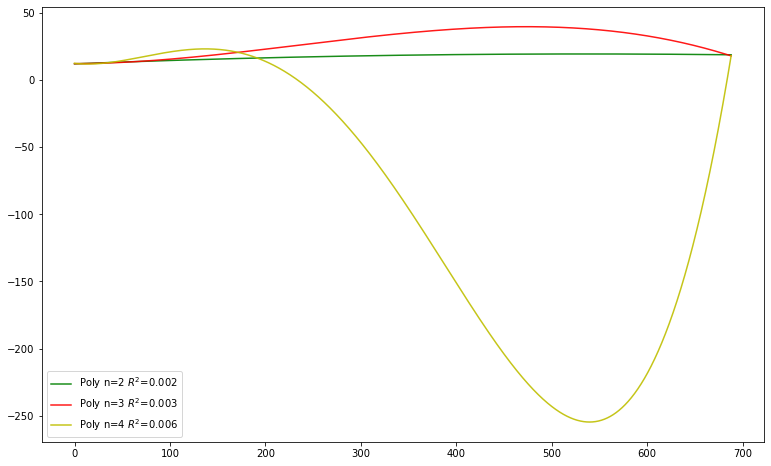

In [36]:
plt.figure(figsize=(8 * 1.618, 8))

#plt.scatter(data.norm_OPR, data.Norm_Deaths)

df1 = data

#poly_1 = smf.ols(formula='Norm_Deaths ~ 1 + norm_OPR', data=data).fit()

x = pd.DataFrame({'norm_OPR': np.linspace(data.norm_OPR.min(), data.norm_OPR.max(), 2000)})

# # 2-nd order polynomial
poly_2 = smf.ols(formula='Norm_Deaths ~ 1 +(norm_OPR) + I(norm_OPR ** 2.0)', data=data).fit()
plt.plot(x.norm_OPR, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.3f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Norm_Deaths ~ 1 + norm_OPR + I(norm_OPR ** 2.0) + I(norm_OPR ** 3.0)', data=data).fit()
plt.plot(x.norm_OPR, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.3f' % poly_3.rsquared)

# 4-rd order polynomial
poly_4 = smf.ols(formula='Norm_Deaths ~ 1 + norm_OPR + I(norm_OPR ** 2.0) + I(norm_OPR ** 3.0) + I(norm_OPR ** 4.0)', data=data).fit()
plt.plot(x.norm_OPR, poly_4.predict(x), 'y-', alpha=0.9, label='Poly n=4 $R^2$=%.3f' % poly_4.rsquared)

plt.legend()


2. Norm_Deaths vs Norm_Unemployment
- Here Norm_Deaths is the dependent variable and Norm_Unemployment is the independent variable

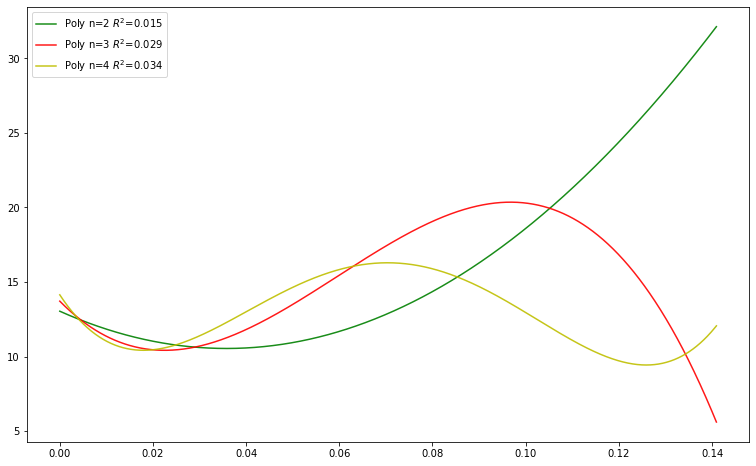

In [37]:
plt.figure(figsize=(8 * 1.618, 8))

#plt.scatter(data.Norm_Unemployment, data.Norm_Deaths)

df1 = data

#poly_1 = smf.ols(formula='Norm_Deaths ~ 1 + norm_OPR', data=data).fit()

x = pd.DataFrame({'Norm_Unemployment': np.linspace(data.Norm_Unemployment.min(), data.Norm_Unemployment.max(), 2000)})


# plt.plot(x.TV, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# # 2-nd order polynomial
poly_2 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_Unemployment + I(Norm_Unemployment ** 2.0)', data=data).fit()
plt.plot(x.Norm_Unemployment, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.3f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_Unemployment + I(Norm_Unemployment ** 2.0) + I(Norm_Unemployment ** 3.0)', data=data).fit()
plt.plot(x.Norm_Unemployment, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.3f' % poly_3.rsquared)

# 4-rd order polynomial
poly_4 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_Unemployment + I(Norm_Unemployment ** 2.0) + I(Norm_Unemployment ** 3.0) + I(Norm_Unemployment ** 4.0)', data=data).fit()
plt.plot(x.Norm_Unemployment, poly_4.predict(x), 'y-', alpha=0.9, label='Poly n=4 $R^2$=%.3f' % poly_4.rsquared)

plt.legend()


3. Norm_Deaths vs. Norm_Drug_Overdose

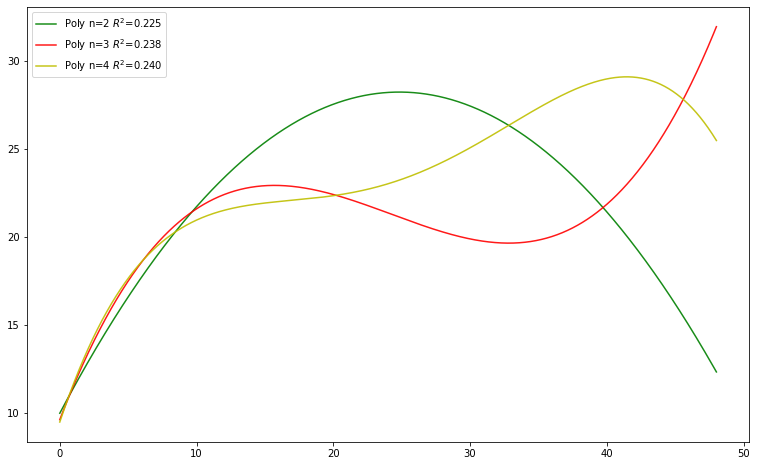

In [38]:
plt.figure(figsize=(8 * 1.618, 8))

#plt.scatter(data.Norm_Deaths, data.norm_OPR)

df1 = data

#poly_1 = smf.ols(formula='Norm_Deaths ~ 1 + norm_OPR', data=data).fit()

x = pd.DataFrame({'Norm_Drug_Overdose': np.linspace(data.Norm_Drug_Overdose.min(), data.Norm_Drug_Overdose.max(), 2000)})


# plt.plot(x.TV, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# # 2-nd order polynomial
poly_2 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_Drug_Overdose + I(Norm_Drug_Overdose ** 2.0)', data=data).fit()
plt.plot(x.Norm_Drug_Overdose, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.3f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_Drug_Overdose + I(Norm_Drug_Overdose ** 2.0) + I(Norm_Drug_Overdose ** 3.0)', data=data).fit()
plt.plot(x.Norm_Drug_Overdose, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.3f' % poly_3.rsquared)

# 4-rd order polynomial
poly_4 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_Drug_Overdose + I(Norm_Drug_Overdose ** 2.0) + I(Norm_Drug_Overdose ** 3.0) + I(Norm_Drug_Overdose ** 4.0)', data=data).fit()
plt.plot(x.Norm_Drug_Overdose, poly_4.predict(x), 'y-', alpha=0.9, label='Poly n=4 $R^2$=%.3f' % poly_4.rsquared)

plt.legend()

4. Norm_Deaths vs. Norm_insufficient_sleep

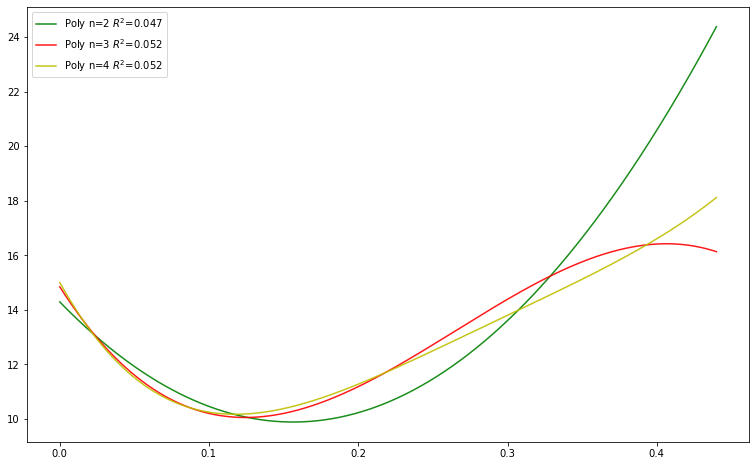

In [39]:
plt.figure(figsize=(8 * 1.618, 8))

#plt.scatter(data.Norm_Deaths, data.norm_OPR)

df1 = data

#poly_1 = smf.ols(formula='Norm_Deaths ~ 1 + norm_OPR', data=data).fit()

x = pd.DataFrame({'Norm_insufficient_sleep': np.linspace(data.Norm_insufficient_sleep.min(), data.Norm_insufficient_sleep.max(), 2000)})


# plt.plot(x.TV, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# # 2-nd order polynomial
poly_2 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_insufficient_sleep + I(Norm_insufficient_sleep ** 2.0)', data=data).fit()
plt.plot(x.Norm_insufficient_sleep, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.3f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_insufficient_sleep + I(Norm_insufficient_sleep ** 2.0) + I(Norm_insufficient_sleep ** 3.0)', data=data).fit()
plt.plot(x.Norm_insufficient_sleep, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.3f' % poly_3.rsquared)

# 4-rd order polynomial
poly_4 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_insufficient_sleep + I(Norm_insufficient_sleep ** 2.0) + I(Norm_insufficient_sleep ** 3.0) + I(Norm_insufficient_sleep ** 4.0)', data=data).fit()
plt.plot(x.Norm_insufficient_sleep, poly_4.predict(x), 'y-', alpha=0.9, label='Poly n=4 $R^2$=%.3f' % poly_4.rsquared)

plt.legend()

5. Norm_Deaths vs.Norm_excessive_drinking

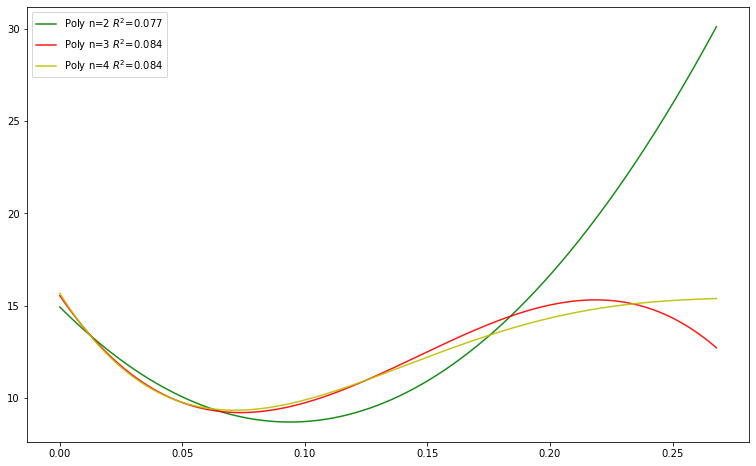

In [40]:
plt.figure(figsize=(8 * 1.618, 8))

#plt.scatter(data.Norm_Deaths, data.norm_OPR)

df1 = data

#poly_1 = smf.ols(formula='Norm_Deaths ~ 1 + norm_OPR', data=data).fit()

x = pd.DataFrame({'Norm_excessive_drinking': np.linspace(data.Norm_excessive_drinking.min(), data.Norm_excessive_drinking.max(), 2000)})


# plt.plot(x.TV, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# # 2-nd order polynomial
poly_2 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_excessive_drinking + I(Norm_excessive_drinking ** 2.0)', data=data).fit()
plt.plot(x.Norm_excessive_drinking, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.3f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_excessive_drinking + I(Norm_excessive_drinking ** 2.0) + I(Norm_excessive_drinking ** 3.0)', data=data).fit()
plt.plot(x.Norm_excessive_drinking, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.3f' % poly_3.rsquared)

# 4-rd order polynomial
poly_4 = smf.ols(formula='Norm_Deaths ~ 1 + Norm_excessive_drinking + I(Norm_excessive_drinking ** 2.0) + I(Norm_excessive_drinking ** 3.0) + I(Norm_excessive_drinking ** 4.0)', data=data).fit()
plt.plot(x.Norm_excessive_drinking, poly_4.predict(x), 'y-', alpha=0.9, label='Poly n=4 $R^2$=%.3f' % poly_4.rsquared)

plt.legend()